# Regression Predict Student Solution

© Explore Data Science Academy

---
### Honour Code

I {**YOUR NAME, YOUR SURNAME**}, confirm - by submitting this document - that the solutions in this notebook are a result of my own work and that I abide by the [EDSA honour code](https://drive.google.com/file/d/1QDCjGZJ8-FmJE3bZdIQNwnJyQKPhHZBn/view?usp=sharing).

Non-compliance with the honour code constitutes a material breach of contract.

### Predict Overview: Spain Electricity Shortfall Challenge

The government of Spain is considering an expansion of it's renewable energy resource infrastructure investments. As such, they require information on the trends and patterns of the countries renewable sources and fossil fuel energy generation. Your company has been awarded the contract to:

- 1. analyse the supplied data;
- 2. identify potential errors in the data and clean the existing data set;
- 3. determine if additional features can be added to enrich the data set;
- 4. build a model that is capable of forecasting the three hourly demand shortfalls;
- 5. evaluate the accuracy of the best machine learning model;
- 6. determine what features were most important in the model’s prediction decision, and
- 7. explain the inner working of the model to a non-technical audience.

Formally the problem statement was given to you, the senior data scientist, by your manager via email reads as follow:

> In this project you are tasked to model the shortfall between the energy generated by means of fossil fuels and various renewable sources - for the country of Spain. The daily shortfall, which will be referred to as the target variable, will be modelled as a function of various city-specific weather features such as `pressure`, `wind speed`, `humidity`, etc. As with all data science projects, the provided features are rarely adequate predictors of the target variable. As such, you are required to perform feature engineering to ensure that you will be able to accurately model Spain's three hourly shortfalls.
 
On top of this, she has provided you with a starter notebook containing vague explanations of what the main outcomes are. 

<a id="cont"></a>

## Table of Contents

<a href=#one>1. Importing Packages</a>

<a href=#two>2. Loading Data</a>

<a href=#three>3. Exploratory Data Analysis (EDA)</a>

<a href=#four>4. Data Engineering</a>

<a href=#five>5. Modeling</a>

<a href=#six>6. Model Performance</a>

<a href=#seven>7. Model Explanations</a>

 <a id="one"></a>
## 1. Importing Packages
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Importing Packages ⚡ |
| :--------------------------- |
| In this section you are required to import, and briefly discuss, the libraries that will be used throughout your analysis and modelling. |

---

In [180]:
# !pip install scipy

In [719]:
# Libraries for data loading, data manipulation and data visulisation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from  scipy import stats
import calendar
from datetime import datetime
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf
import pandas 
from scipy.stats import chi2_contingency
import re
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)


sns.set_style('whitegrid')

# Libraries for data preparation and model building
#import *

# Setting global constants to ensure notebook results are reproducible
PARAMETER_CONSTANT = 4

<a id="two"></a>
## 2. Loading the Data
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Loading the data ⚡ |
| :--------------------------- |
| In this section you are required to load the data from the `df_train` file into a DataFrame. |

---

In [752]:
df = pd.read_csv('df_train.csv')

<a id="three"></a>
## 3. Exploratory Data Analysis (EDA)
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Exploratory data analysis ⚡ |
| :--------------------------- |
| In this section, you are required to perform an in-depth analysis of all the variables in the DataFrame. |

---


### 3.1. Preview Data

In [753]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 49 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            8763 non-null   int64  
 1   time                  8763 non-null   object 
 2   Madrid_wind_speed     8763 non-null   float64
 3   Valencia_wind_deg     8763 non-null   object 
 4   Bilbao_rain_1h        8763 non-null   float64
 5   Valencia_wind_speed   8763 non-null   float64
 6   Seville_humidity      8763 non-null   float64
 7   Madrid_humidity       8763 non-null   float64
 8   Bilbao_clouds_all     8763 non-null   float64
 9   Bilbao_wind_speed     8763 non-null   float64
 10  Seville_clouds_all    8763 non-null   float64
 11  Bilbao_wind_deg       8763 non-null   float64
 12  Barcelona_wind_speed  8763 non-null   float64
 13  Barcelona_wind_deg    8763 non-null   float64
 14  Madrid_clouds_all     8763 non-null   float64
 15  Seville_wind_speed   

Unnamed: 0                 time  Madrid_wind_speed Valencia_wind_deg  Bilbao_rain_1h  Valencia_wind_speed  Seville_humidity  Madrid_humidity  Bilbao_clouds_all  Bilbao_wind_speed  Seville_clouds_all  Bilbao_wind_deg  Barcelona_wind_speed  Barcelona_wind_deg  Madrid_clouds_all  Seville_wind_speed  Barcelona_rain_1h Seville_pressure  Seville_rain_1h  Bilbao_snow_3h  Barcelona_pressure  Seville_rain_3h  Madrid_rain_1h  Barcelona_rain_3h  Valencia_snow_3h  Madrid_weather_id  Barcelona_weather_id  Bilbao_pressure  Seville_weather_id  Valencia_pressure  Seville_temp_max  Madrid_pressure  Valencia_temp_max  Valencia_temp  Bilbao_weather_id  Seville_temp  Valencia_humidity  Valencia_temp_min  Barcelona_temp_max  Madrid_temp_max  Barcelona_temp  Bilbao_temp_min  Bilbao_temp  Barcelona_temp_min  Bilbao_temp_max  Seville_temp_min  Madrid_temp  Madrid_temp_min  load_shortfall_3h
0           0  2015-01-01 03:00:00           0.666667           level_5             0.0             0.666667         74.333333        64.000000                0.0           1.000000                 0.0       223.333333              6.333333           42.666667                0.0            3.333333                0.0             sp25              0.0             0.0         1036.333333              0.0             0.0                0.0               0.0              800.0                 800.0      1035.000000               800.0        1002.666667        274.254667       971.333333         269.888000     269.888000              800.0    274.254667          75.666667         269.888000          281.013000       265.938000      281.013000       269.338615   269.338615          281.013000       269.338615        274.254667   265.938000       265.938000        6715.666667
1           1  2015-01-01 06:00:00           0.333333          level_10             0.0             1.666667         78.333333        64.666667                0.0           1.000000                 0.0       221.000000              4.000000          139.000000                0.0            3.333333                0.0             sp25              0.0             0.0         1037.333333              0.0             0.0                0.0               0.0              800.0                 800.0      1035.666667               800.0        1004.333333        274.945000       972.666667         271.728333     271.728333              800.0    274.945000          71.000000         271.728333          280.561667       266.386667      280.561667       270.376000   270.376000          280.561667       270.376000        274.945000   266.386667       266.386667        4171.666667
2           2  2015-01-01 09:00:00           1.000000           level_9             0.0             1.000000         71.333333        64.333333                0.0           1.000000                 0.0       214.333333              2.000000          326.000000                0.0            2.666667                0.0             sp25              0.0             0.0         1038.000000              0.0             0.0                0.0               0.0              800.0                 800.0      1036.000000               800.0        1005.333333        278.792000       974.000000         278.008667     278.008667              800.0    278.792000          65.666667         278.008667          281.583667       272.708667      281.583667       275.027229   275.027229          281.583667       275.027229        278.792000   272.708667       272.708667        4274.666667
3           3  2015-01-01 12:00:00           1.000000           level_8             0.0             1.000000         65.333333        56.333333                0.0           1.000000                 0.0       199.666667              2.333333          273.000000                0.0            4.000000                0.0             sp25              0.0             0.0         1037.000000              0.0             0.0                0.0               0.0             

In [754]:
# drop index column
df.drop(columns ={'Unnamed: 0'}, 
        inplace=True)

#lowercase all columns
df.columns = df.columns.str.lower()

The are 8763 observations spanning across 48 columns. There is evidence to suggest that there are some missing values in the dataset. 

In [756]:
# convert time column from object to timestamp
df['time'] = pd.to_datetime(df['time'])

In [757]:
num_vars = df.select_dtypes(include = 'number').columns.to_list()

cat_vars = df.select_dtypes(include = 'object').columns.to_list()
time_vars = df.select_dtypes(include = 'datetime').columns.to_list()

print(f'We have:','\n',
      f'{len(num_vars)} numerical variables','\n'
      f' {len(cat_vars)} categorical variables','\n'
      f' {len(time_vars)} timestamp column'
     )

We have: 
 45 numerical variables 
 2 categorical variables 
 1 timestamp columns


### 3.2. Check For Missing Values

In [724]:
missing_collection =zip(
    df[
        df.columns[df.isna().sum()>0]
    ]
    .isna()
    .sum()
    .index,
    df[
        df.columns[df.isna().sum()>0]
    ]
    .isna()
    .sum()
    .values
)

for i,j in missing_collection :
    print(f"{i} has {j} missing values which is {j/len(df):.2%} of the total number of rows","\n") 
    

valencia_pressure has 2068 missing values which is 23.60% of the total number of rows 



### 3.4. Univariate Analysis


#### 3.4.1 Numerical Variables

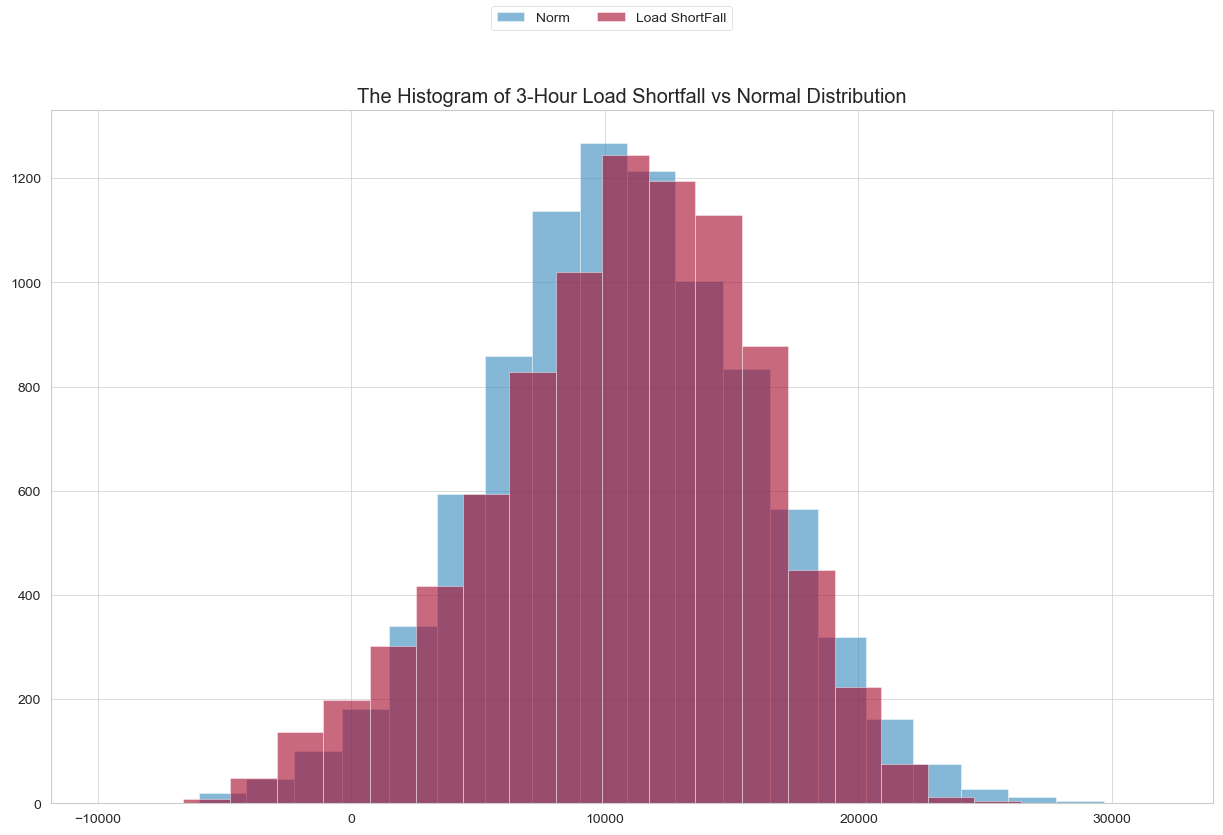

In [758]:
# target variable
fig, ax = plt.subplots(figsize=(15,9))

# sampling from a normal distribution
mean_val =  df['load_shortfall_3h'].mean()
std_dev = df['load_shortfall_3h'].std()
ax.hist([np.random.normal(loc=mean_val, scale=std_dev) for i in range(len(df))],
        alpha=0.6,
        label='Norm',
        bins=21
       )
ax.hist(df['load_shortfall_3h'].values,
        alpha=0.6,
        label='Load ShortFall',
        bins=21
       )
ax.set_title("The Histogram of 3-Hour Load Shortfall vs Normal Distribution")
lines_labels = [ax.get_legend_handles_labels() for ax in fig.axes]
lines, labels = [sum(lol, []) for lol in zip(*lines_labels)]

# Finally, the legend (that maybe you'll customize differently)
fig.legend(lines, labels, loc='upper center', ncol=2)
plt.show()

In [759]:
print(f"The Skew is {stats.skew(df['load_shortfall_3h'].values)}")
print(f"The Kurtosis is {stats.kurtosis(df['load_shortfall_3h'].values)}")

The Skew is -0.3847811918590848
The Kurtosis is -0.1196155018215368


The above indicate that the load shortfall 3h is slightly skewed to the left

In [727]:
# look at data statistics
statistics_df = df.describe().T
statistics_df

count          mean           std          min          25%           50%           75%           max
madrid_wind_speed     8763.0      2.425729      1.850371     0.000000     1.000000      2.000000      3.333333  1.300000e+01
bilbao_rain_1h        8763.0      0.135753      0.374901     0.000000     0.000000      0.000000      0.100000  3.000000e+00
valencia_wind_speed   8763.0      2.586272      2.411190     0.000000     1.000000      1.666667      3.666667  5.200000e+01
seville_humidity      8763.0     62.658793     22.621226     8.333333    44.333333     65.666667     82.000000  1.000000e+02
madrid_humidity       8763.0     57.414717     24.335396     6.333333    36.333333     58.000000     78.666667  1.000000e+02
bilbao_clouds_all     8763.0     43.469132     32.551044     0.000000    10.000000     45.000000     75.000000  1.000000e+02
bilbao_wind_speed     8763.0      1.850356      1.695888     0.000000     0.666667      1.000000      2.666667  1.266667e+01
seville_clouds_all    8763.0     13.714748     24.272482     0.000000     0.000000      0.000000     20.000000  9.733333e+01
bilbao_wind_deg       8763.0    158.957511    102.056299     0.000000    73.333333    147.000000    234.000000  3.593333e+02
barcelona_wind_speed  8763.0      2.870497      1.792197     0.000000     1.666667      2.666667      4.000000  1.266667e+01
barcelona_wind_deg    8763.0    190.544848     89.077337     0.000000   118.166667    200.000000    260.000000  3.600000e+02
madrid_clouds_all     8763.0     19.473392     28.053660     0.000000     0.000000      0.000000     33.333333  1.000000e+02
seville_wind_speed    8763.0      2.425045      1.672895     0.000000     1.000000      2.000000      3.333333  1.166667e+01
barcelona_rain_1h     8763.0      0.128906      0.634730     0.000000     0.000000      0.000000      0.000000  1.200000e+01
seville_rain_1h       8763.0      0.039439      0.175857     0.000000     0.000000      0.000000      0.000000  3.000000e+00
bilbao_snow_3h        8763.0      0.031912      0.557264     0.000000     0.000000      0.000000      0.000000  2.130000e+01
barcelona_pressure    8763.0   1377.964605  14073.140990   670.666667  1014.000000   1018.000000   1022.000000  1.001411e+06
seville_rain_3h       8763.0      0.000243      0.003660     0.000000     0.000000      0.000000      0.000000  9.333333e-02
madrid_rain_1h        8763.0      0.037818      0.152639     0.000000     0.000000      0.000000      0.000000  3.000000e+00
barcelona_rain_3h     8763.0      0.000439      0.003994     0.000000     0.000000      0.000000      0.000000  9.300000e-02
valencia_snow_3h      8763.0      0.000205      0.011866     0.000000     0.000000      0.000000      0.000000  7.916667e-01
madrid_weather_id     8763.0    773.527594     77.313315   211.000000   800.000000    800.000000    800.666667  8.040000e+02
barcelona_weather_id  8763.0    765.979687     88.142235   200.666667   800.000000    800.333333    801.000000  8.040000e+02
bilbao_pressure       8763.0   1017.739549     10.046124   971.333333  1013.000000   1019.000000   1024.000000  1.042000e+03
seville_weather_id    8763.0    774.658818     71.940009   200.000000   800.000000    800.000000    800.000000  8.040000e+02
valencia_pressure     6695.0   1012.051407      9.506214   972.666667  1010.333333   1015.000000   1018.000000  1.021667e+03
seville_temp_max      8763.0    297.479527      8.875812   272.063000   291.312750    297.101667    304.150000  3.204833e+02
madrid_pressure       8763.0   1010.316920     22.198555   927.666667  1012.333333   1017.333333   1022.000000  1.038000e+03
valencia_temp_max     8763.0    291.337233      7.565692   269.888000   285.550167    291.037000    297.248333  3.142633e+02
valencia_temp         8763.0    290.592152      7.162274   269.888000   285.150000    290.176667    296.056667  3.104267e+02
bilbao_weather_id     8763.0    724.722362    115.846537   207.333333   700.333333    800.000000    801.666667  8.040000e+02
seville_temp          8

In [728]:
def skew_likelihood_check(row):
    if row['mean']>row['50%']:
        return f"is most likely skewed to the right."
    elif row['mean']<row['50%']:
        return f"is most likely skewed to the left."
    else:
        return f"is most likely symmetrical"
        
statistics_df.apply(skew_likelihood_check,axis=1).sort_values()

barcelona_weather_id     is most likely skewed to the left.
valencia_humidity        is most likely skewed to the left.
bilbao_weather_id        is most likely skewed to the left.
madrid_pressure          is most likely skewed to the left.
valencia_pressure        is most likely skewed to the left.
seville_weather_id       is most likely skewed to the left.
bilbao_pressure          is most likely skewed to the left.
madrid_weather_id        is most likely skewed to the left.
barcelona_wind_deg       is most likely skewed to the left.
load_shortfall_3h        is most likely skewed to the left.
seville_humidity         is most likely skewed to the left.
madrid_humidity          is most likely skewed to the left.
bilbao_clouds_all        is most likely skewed to the left.
valencia_wind_speed     is most likely skewed to the right.
seville_temp            is most likely skewed to the right.
bilbao_rain_1h          is most likely skewed to the right.
valencia_temp_min       is most likely s

#### 3.4.2. Categorical Variables

In [729]:
# number of unique values in the column
cat_unique = (
    df
    .select_dtypes(include='object')
    .nunique()
)

for i,j in zip(cat_unique.index, cat_unique.values):
    print(f"{i} has {j} unique values.")

valencia_wind_deg has 10 unique values.
seville_pressure has 25 unique values.


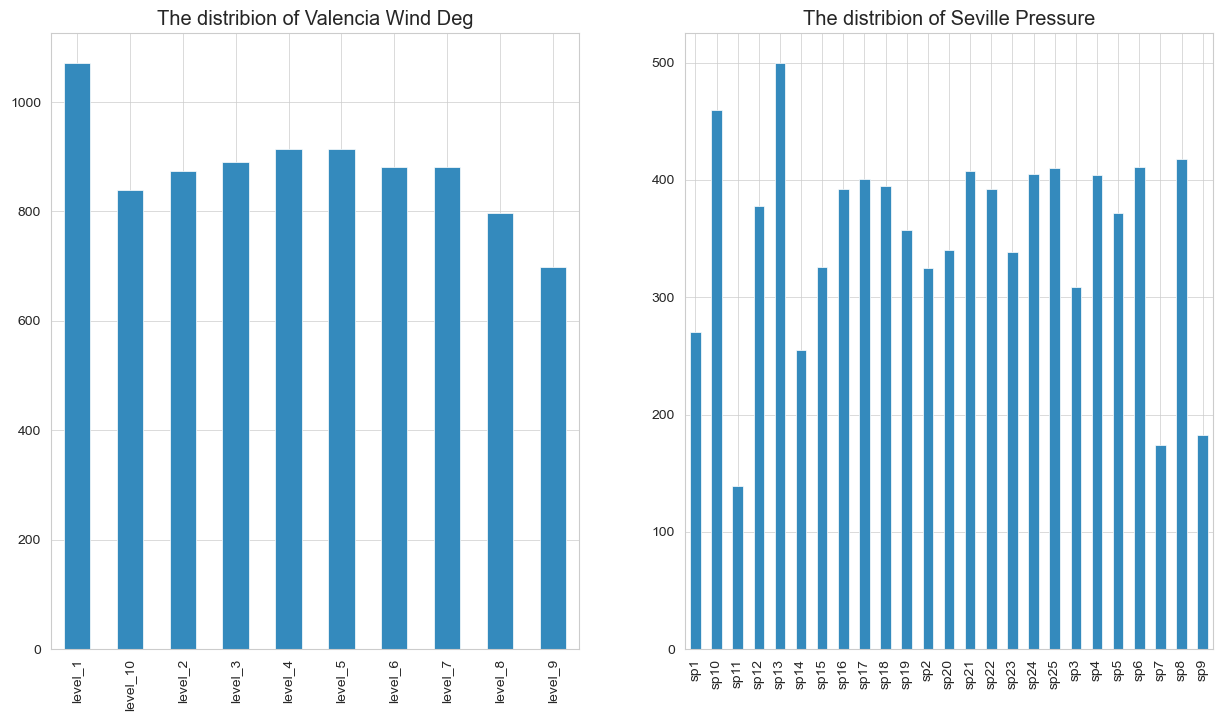

In [770]:
# distributions of the categorical variables
cat_cols = (
    df
    .select_dtypes(include='object')
    .columns
    .to_list()
)

#
fig, axes = plt.subplots(1,len(cat_cols) ,figsize=(15,8))
i = 0
for col in cat_cols:
    (
        df[col]
        .value_counts()
        .sort_index(ascending=True)
        .plot(kind='bar',
              ax=axes[i],
              title = f"The distribion of {re.sub(r'_',' ', col).title()}"
             )
    )
    i+=1
plt.show()

### 3.5. Multivariate Analysis

#### 3.5.1. Numerical Multivariate Analysis

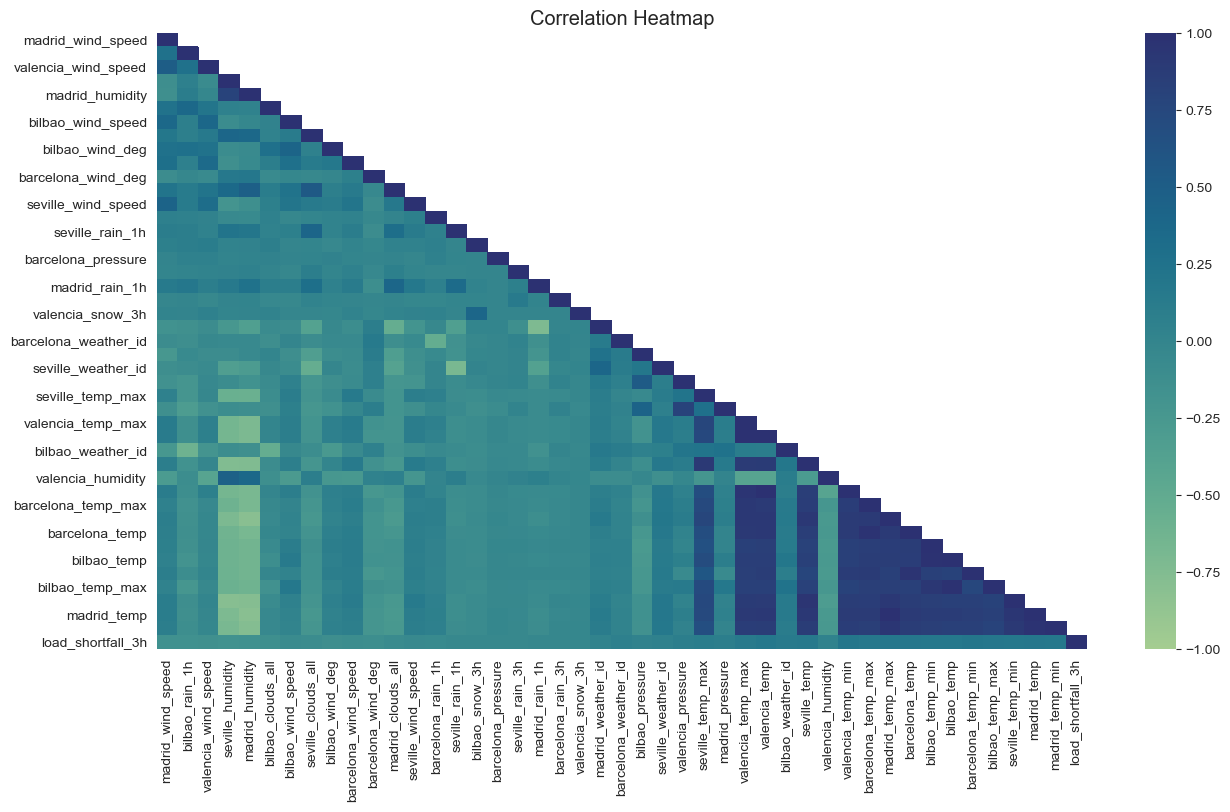

In [766]:
# evaluate correlation : Spearson Correlation
plt.figure(figsize=(15,8))
mask = np.tril(df.corr())==0

sns.heatmap(df.corr(),
            vmin=-1,
            vmax=1,
            mask=mask,
            cmap='crest'
           )

plt.title('Correlation Heatmap');

Top 10 variables that are correlated with the target : ignoring direction : spearson correlation

In [733]:
corr_top10_df = (
    df.corr()['load_shortfall_3h']
    .apply(lambda x : abs(x))
    .sort_values(ascending=False)
    .head(11)
)
corr_top10_df[1:11]

valencia_temp_min     0.201863
barcelona_temp_min    0.195984
madrid_temp           0.186036
barcelona_temp        0.182673
madrid_temp_max       0.182548
bilbao_temp_max       0.180934
bilbao_temp           0.176411
madrid_temp_min       0.174744
seville_temp_min      0.174718
valencia_temp         0.173225
Name: load_shortfall_3h, dtype: float64

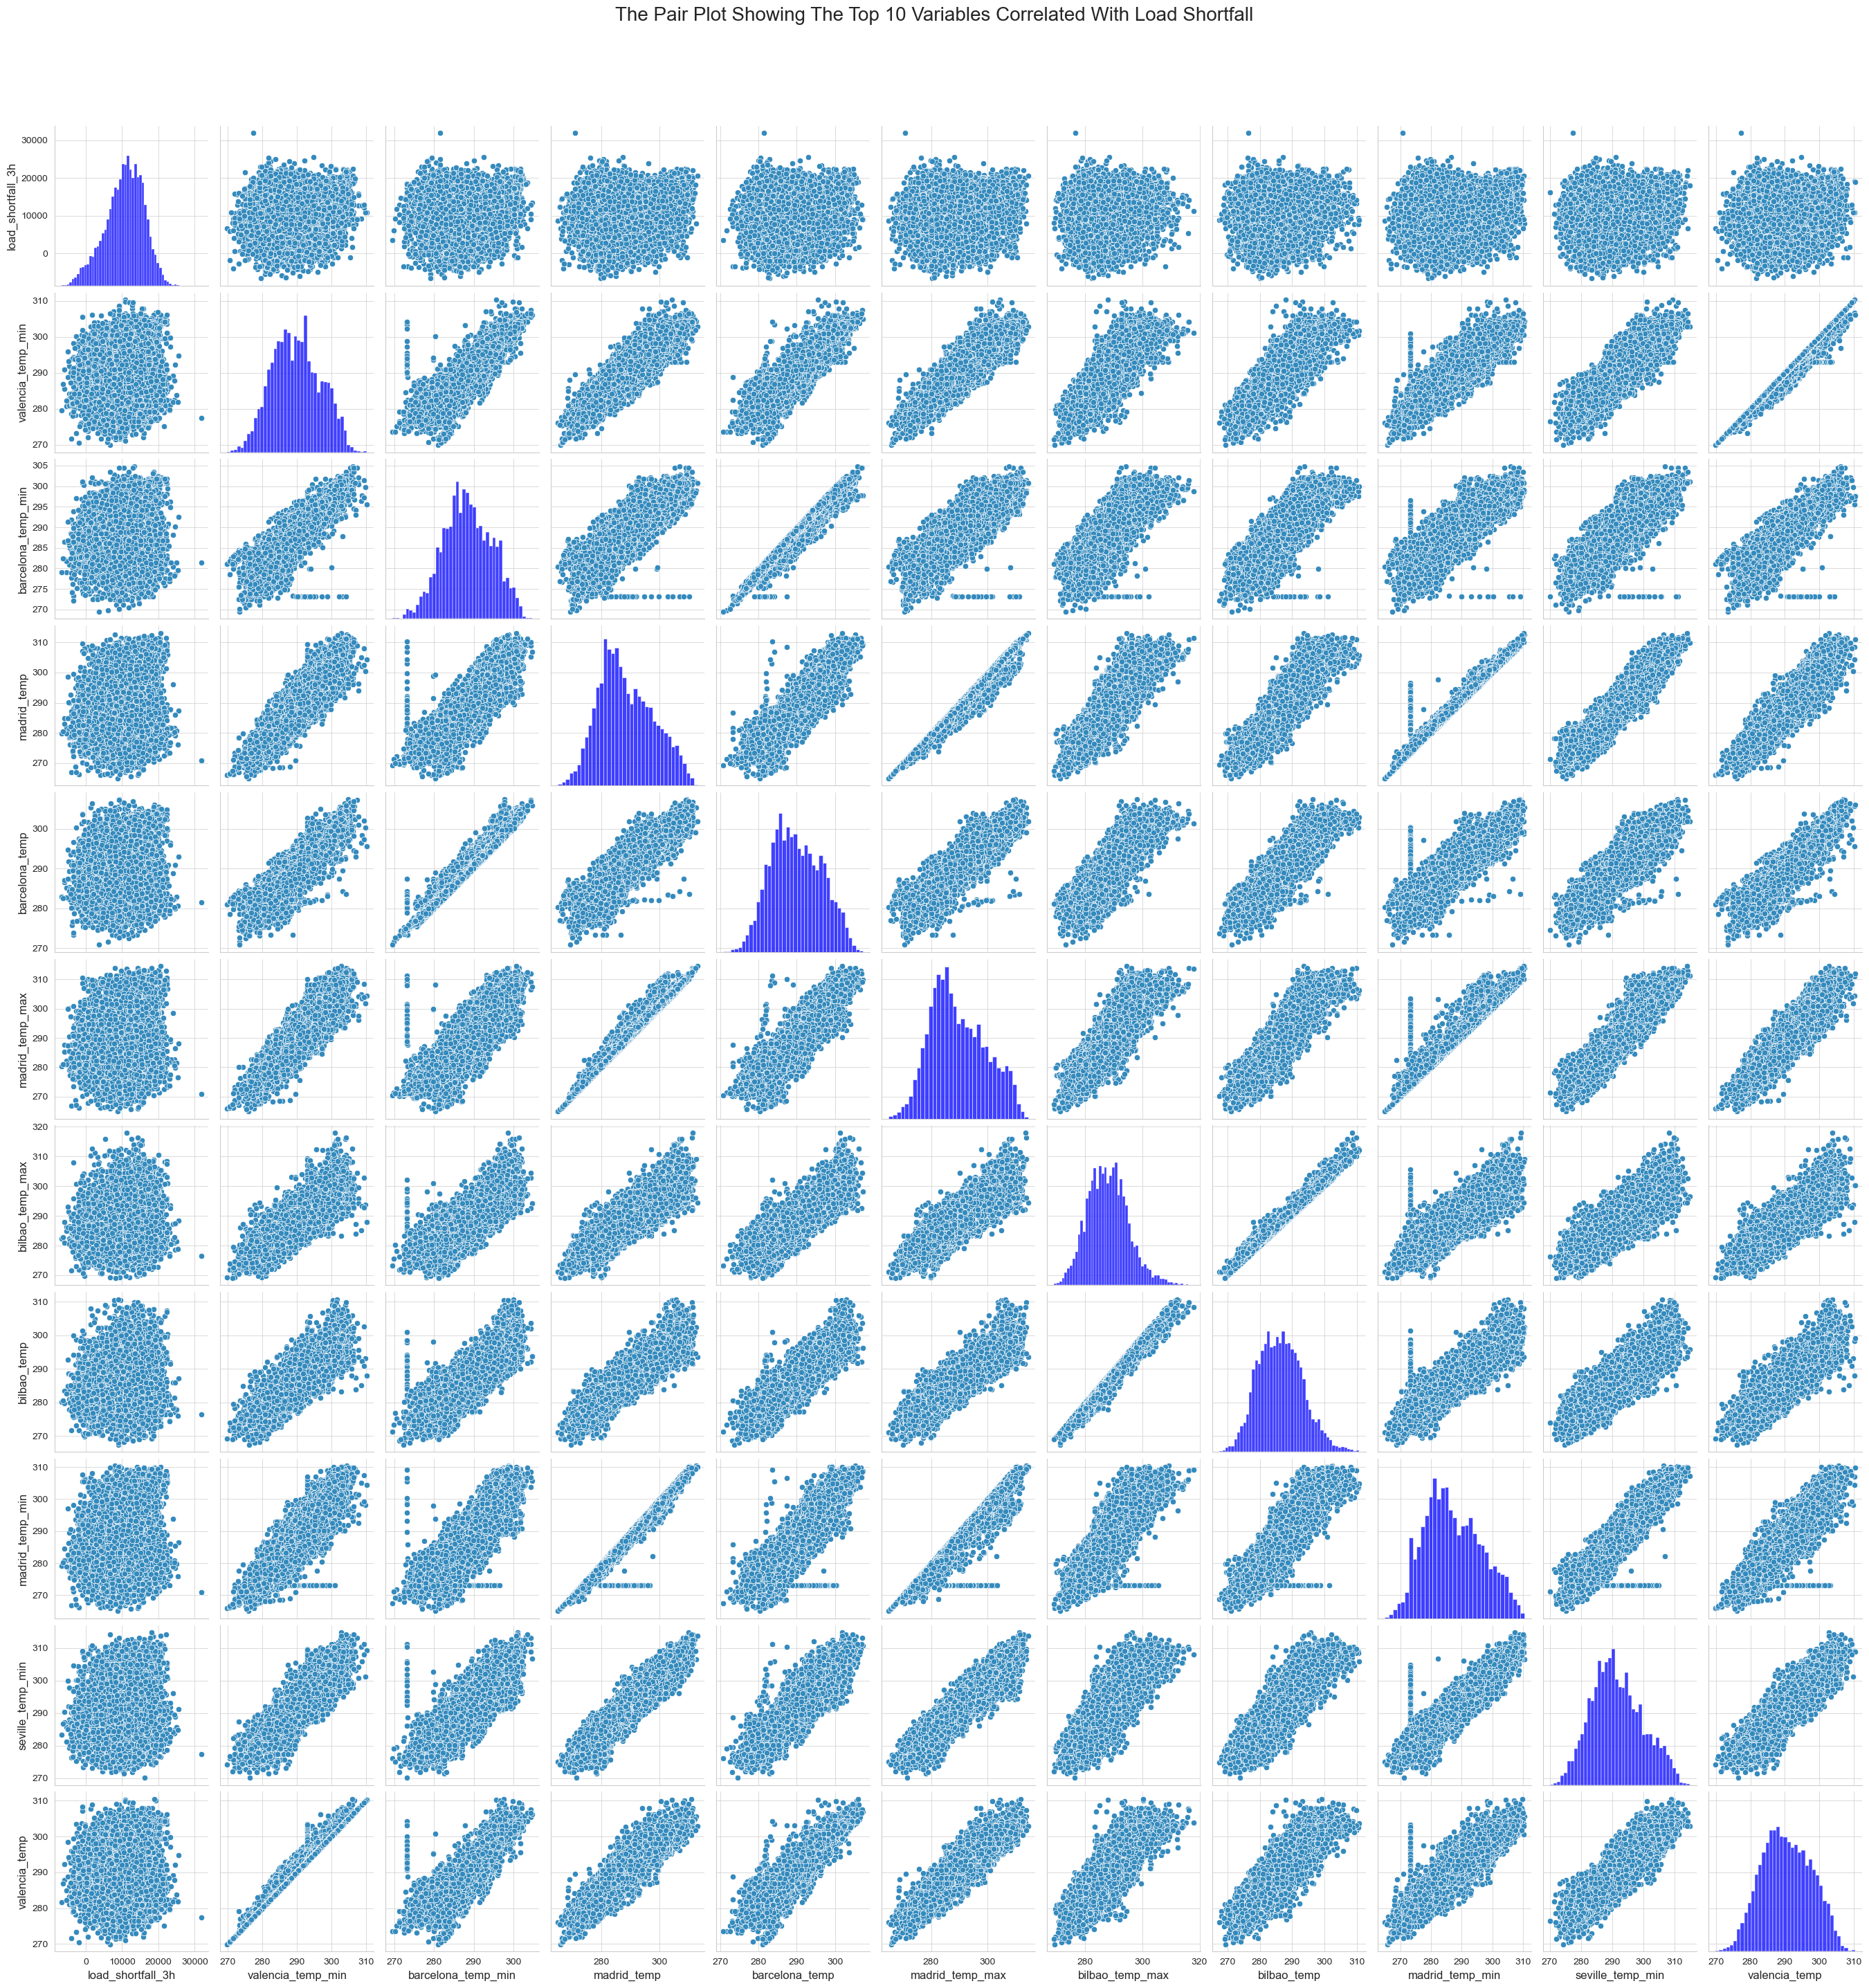

In [734]:
top10 = sns.pairplot(df[corr_top10_df.index]
                    )
top10.fig.suptitle('The Pair Plot Showing The Top 10 Variables Correlated With Load Shortfall', 
                   y=1.05,
                   size=20)
plt.show()

No obvious relationship with the target variable

#### 3.5.2. Categorical Multivariate Analysis

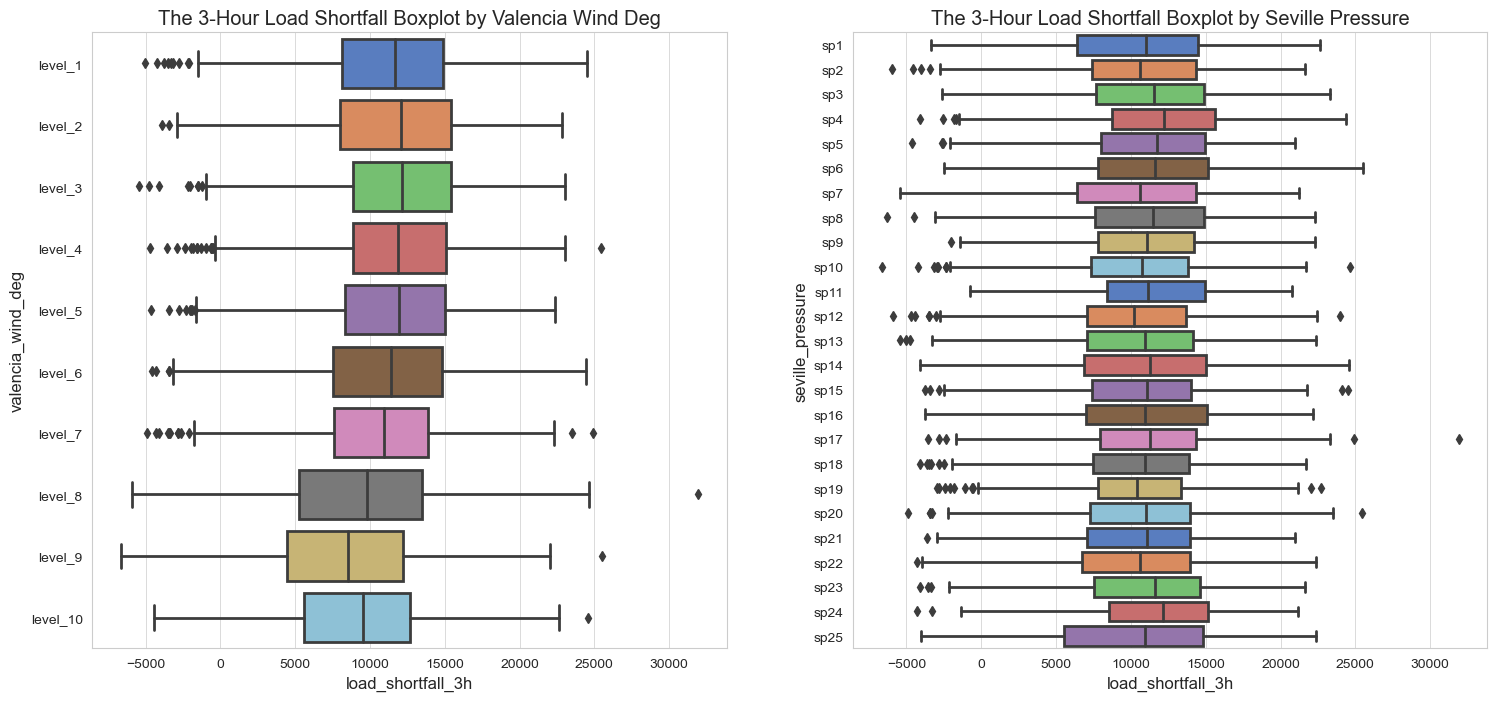

In [768]:
# categorical variables vs target
fig,axes = plt.subplots(1,
                        2,
                        figsize=(18,8)
                       )
counter=0


for col in cat_cols:
    df[f"{col}_sort"] =  df[col].apply(lambda  x : int(re.search(r"\d+", x ).group()))
    sns.boxplot(
        data=df.sort_values(by = f"{col}_sort"),
        x='load_shortfall_3h',
        y=col,
        palette='muted',
        ax = axes[counter]
    ).set_title(f"The 3-Hour Load Shortfall Boxplot by {re.sub('_', ' ',col).title()}")
    counter+=1
    df.drop(columns=[f"{col}_sort"],
            inplace=True
           )

plt.show()

In [737]:
# chi-squared independent test for categorical variables

# contigency table
ct = pd.crosstab(df['valencia_wind_deg'], 
                 df['seville_pressure'],
                 margins=True
                )

obs = ct.iloc[:-1,:-1]
res = chi2_contingency(obs)
print(f"The test_statistics is {res[0]} and the p_value is {res[1]} at {res[2]} degrees of freedom")

The test_statistics is 1259.86678922933 and the p_value is 8.708288784985601e-147 at 216 degrees of freedom


The p-value is small providing evidence against the fact that the 2 variables are independent

#### 3.5.3. Time Effects on the 3-Hour Load Shortfall

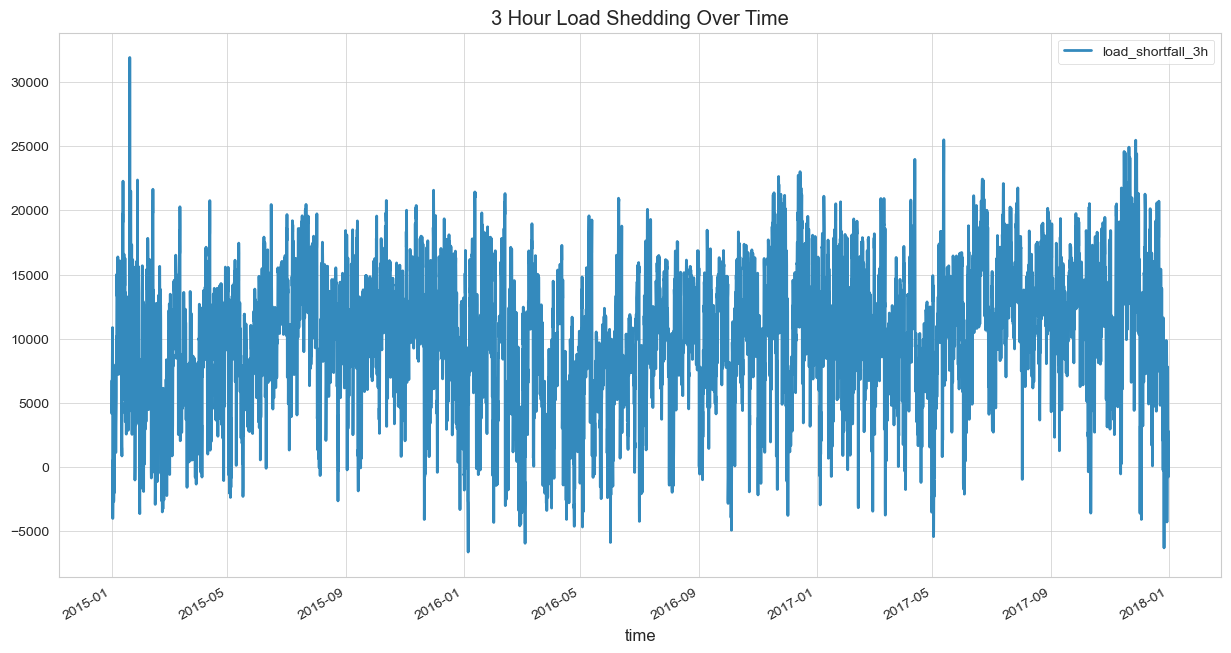

In [738]:
fig1, ax1 = plt.subplots(figsize=(15,9))
(
    df[['time','load_shortfall_3h']]
    .set_index('time')
    .plot(figsize=(15,8),
          ax=ax1
         )
)
ax1.set_title('3 Hour Load Shedding Over Time')
plt.show()

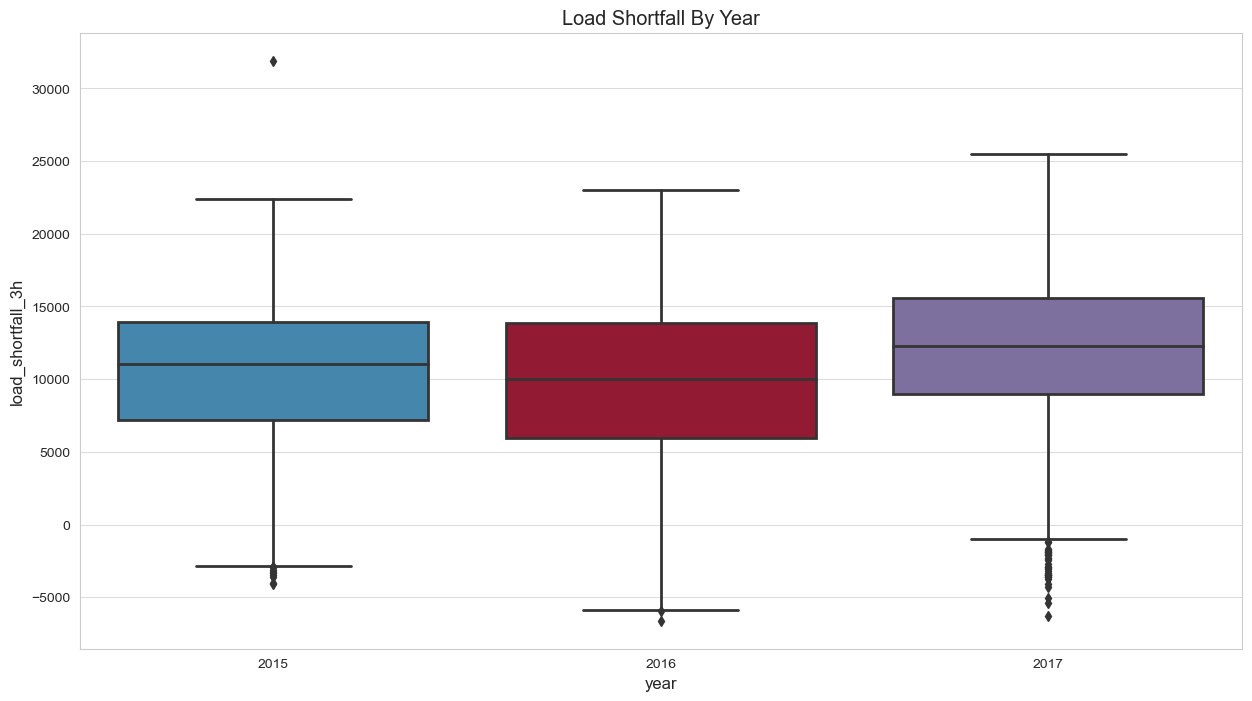

In [739]:
df['year'] = df['time'].dt.year
fig, ax = plt.subplots(figsize=(15,8))
sns.boxplot(data=df, x="year", y="load_shortfall_3h")
ax.set_title('Load Shortfall By Year')
plt.show()

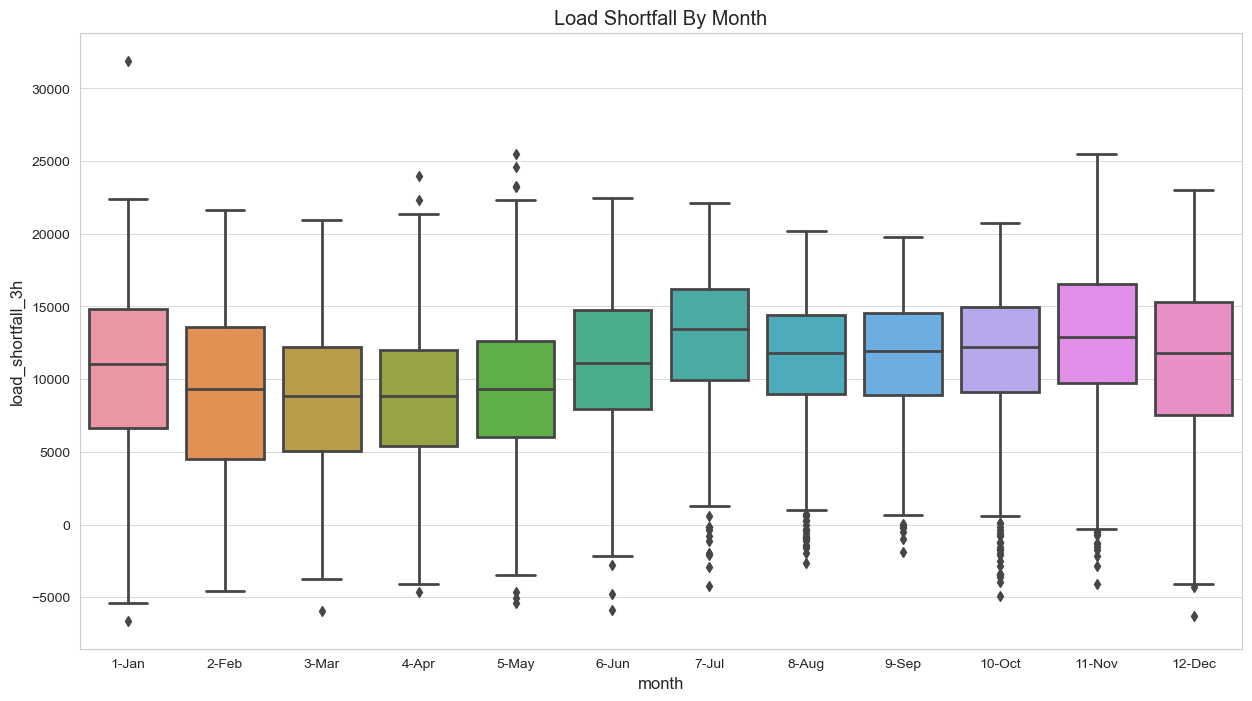

In [740]:
df['month'] = df['time'].dt.month.apply(lambda x : f'{x}-{calendar.month_abbr[x]}')
fig, ax = plt.subplots(figsize=(15,8))
sns.boxplot(data=df, x="month", y="load_shortfall_3h")
ax.set_title('Load Shortfall By Month')
plt.show()

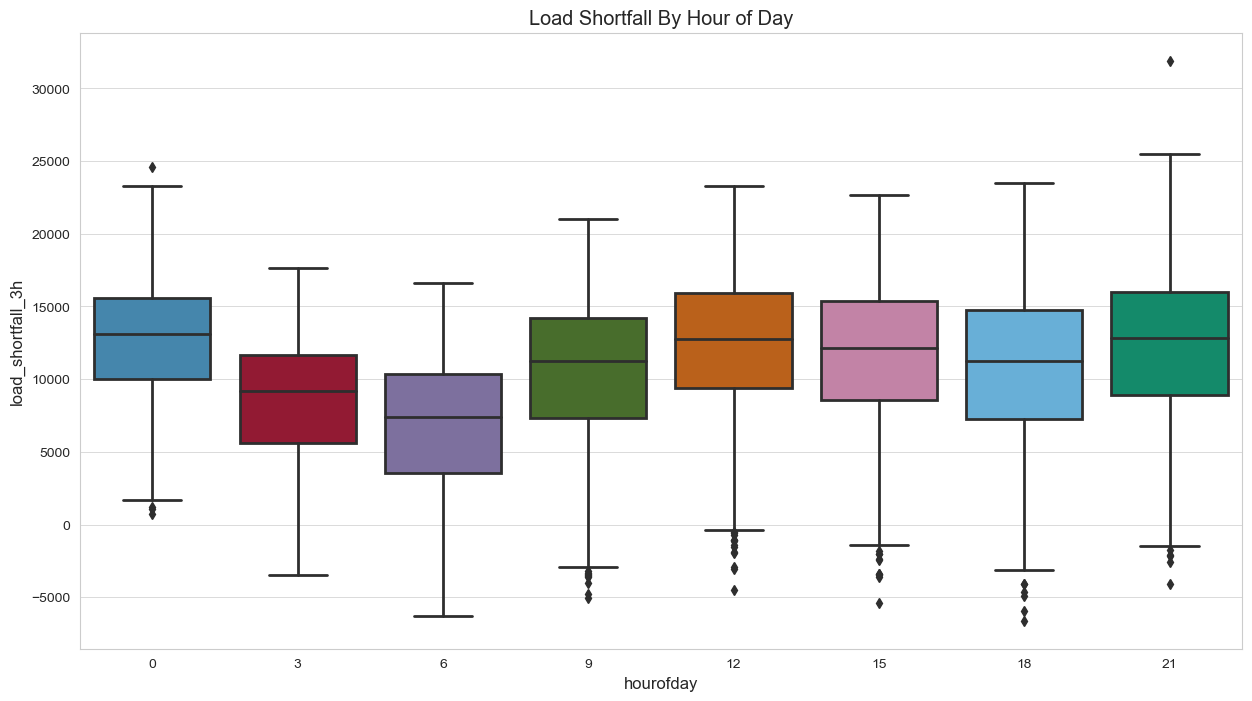

In [741]:
df['hourofday'] = df['time'].dt.hour 
fig, ax = plt.subplots(figsize=(15,8))
sns.boxplot(data=df,
            x="hourofday",
            y="load_shortfall_3h"
           )
ax.set_title('Load Shortfall By Hour of Day')
plt.show()

In [743]:
# df['dayofmonth'] = df['time'].dt.day
# for j in range(2015,2018):
#      for i in range(1,13):
#         i = "{:02d}".format(i)
#           x = f"{j}-{i}"
#             filtered_df = df[df['time'].apply(lambda x: x.strftime('%Y-%m'))==x]
#             (filtered_df[['dayofmonth','load_shortfall_3h']]
#           .set_index('dayofmonth')
#           .plot(figsize=(15,5)
#              )
#         )
#         plt.show()

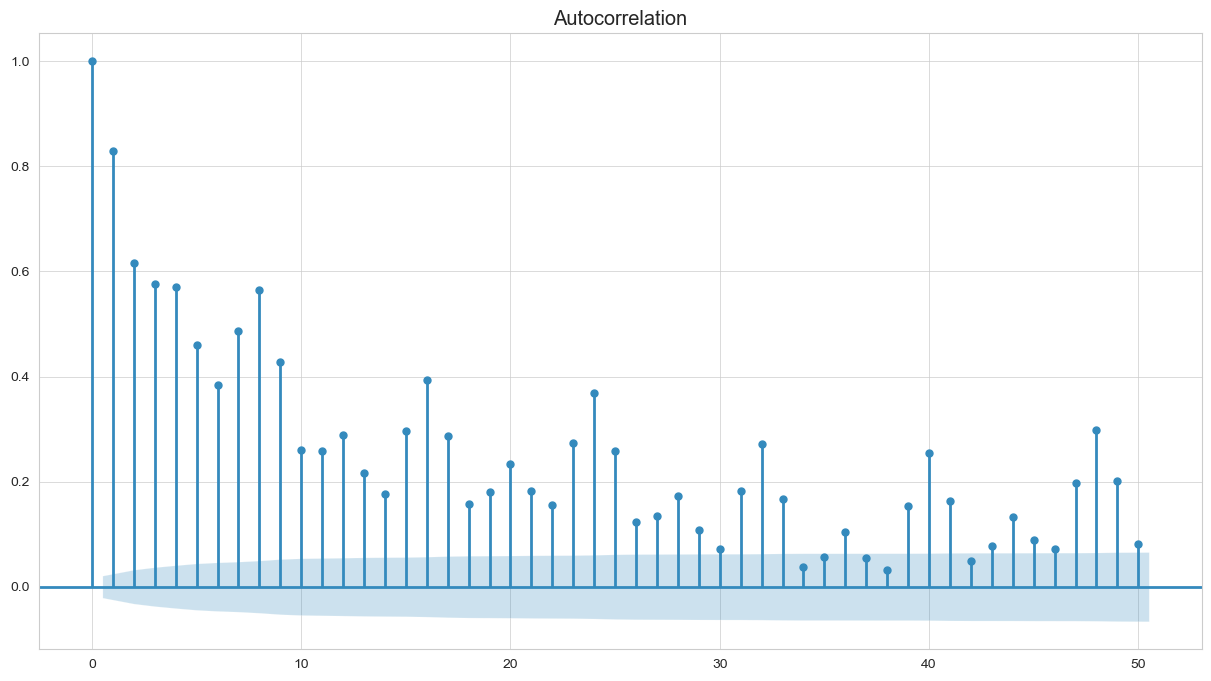

In [744]:
fig, axes = plt.subplots(figsize=(15,8))
plot_acf(df['load_shortfall_3h'], 
         lags=50,
         ax=axes
        )
plt.show()

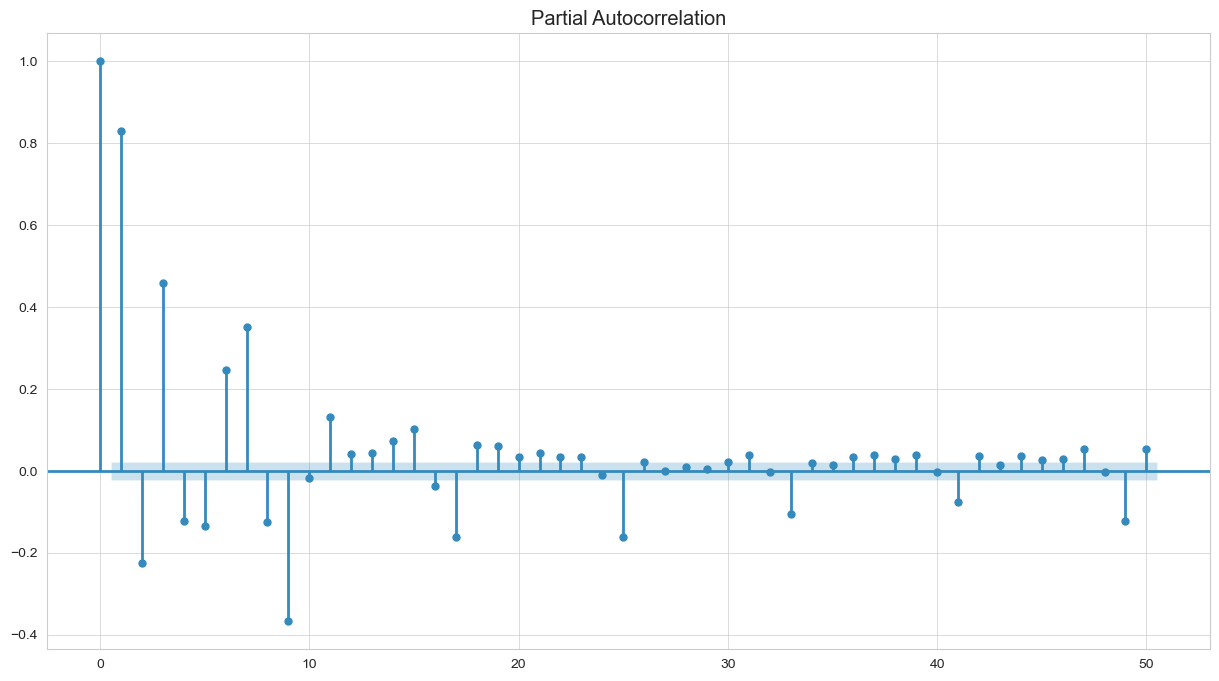

In [745]:
fig, axes = plt.subplots(figsize=(15,8))
plot_pacf(df['load_shortfall_3h'], 
          lags=50,
          ax=axes
         )
plt.show()

In [746]:
# have a look at feature distributions

<a id="four"></a>
## 4. Data Engineering
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Data engineering ⚡ |
| :--------------------------- |
| In this section you are required to: clean the dataset, and possibly create new features - as identified in the EDA phase. |

---

In [ ]:
# remove missing values/ features


In [ ]:
# create new features

In [ ]:
# engineer existing features

<a id="five"></a>
## 5. Modelling
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Modelling ⚡ |
| :--------------------------- |
| In this section, you are required to create one or more regression models that are able to accurately predict the thee hour load shortfall. |

---

In [ ]:
# split data

In [ ]:
# create targets and features dataset

In [ ]:
# create one or more ML models

In [ ]:
# evaluate one or more ML models

<a id="six"></a>
## 6. Model Performance
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Model performance ⚡ |
| :--------------------------- |
| In this section you are required to compare the relative performance of the various trained ML models on a holdout dataset and comment on what model is the best and why. |

---

In [ ]:
# Compare model performance

In [ ]:
# Choose best model and motivate why it is the best choice

<a id="seven"></a>
## 7. Model Explanations
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Model explanation ⚡ |
| :--------------------------- |
| In this section, you are required to discuss how the best performing model works in a simple way so that both technical and non-technical stakeholders can grasp the intuition behind the model's inner workings. |

---

In [ ]:
# discuss chosen methods logic